In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
energy = pd.read_csv('energy_clean.csv',index_col=0)

energy.index = pd.to_datetime(energy.index,format='%Y-%m-%d %H:00:00')

energy.describe()

,YUAG,Berkeley,Hopper,304Elm,38HH,320Temple,53Wall,Sprague,Malone,Trumbull,17HH
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,188.909138,90.500261,92.632525,7.860160,5.222565,1.872265,19.147776,45.183126,133.455251,96.632986,148.072425
std,78.944812,27.173011,22.498846,3.545524,2.132118,0.742996,5.072057,12.324690,21.301276,26.221329,22.442231
min,3.300000,18.800000,16.700000,0.200000,1.800000,0.100000,0.500000,8.000000,3.300000,1.800000,4.300000
25%,120.725000,67.525000,75.500000,5.000000,3.500000,1.400000,15.500000,34.400000,120.300000,76.525000,135.700000
50%,147.950000,85.500000,89.550000,8.500000,4.500000,1.800000,17.500000,43.000000,130.600000,93.200000,147.500000
75%,282.200000,115.000000,110.500000,9.000000,6.700000,2.200000,22.400000,54.200000,149.700000,119.275000,162.375000
max,413.700000,162.200000,154.800000,23.500000,13.000000,4.800000,38.400000,86.900000,213.000000,194.900000,239.300000


In [22]:
weather = pd.read_csv('weather_clean.csv',index_col=0)

weather.index = pd.to_datetime(weather.index,format='%Y-%m-%d %H:00:00')

weather_match = (weather.truncate(energy.index[0],energy.index[len(energy)-1])
                        .drop_duplicates()
                        .reindex(index=energy.index)
                        .interpolate(method='time',limit=6)
                )

weather_match.describe()

,temp,temp_min,temp_max,pressure,humidity
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,283.163197,281.003892,285.092570,1017.522745,72.275952
std,10.263849,10.243680,10.414077,8.607577,21.173127
min,253.940000,247.150000,257.150000,983.000000,10.000000
25%,275.352500,274.150000,277.150000,1012.000000,56.000000
50%,282.480000,280.150000,284.150000,1017.000000,75.000000
75%,291.685000,289.150000,294.150000,1022.000000,93.000000
max,306.410000,304.150000,309.150000,1044.000000,100.000000


In [4]:
# isolates and normalizes the clean residential colleges

energy = energy.drop(energy.columns[np.array([0,3,4,5,6,7,8,9,10])], axis=1)

energy['resi'] = energy['Berkeley'] + energy['Hopper']

energy['resi'] = energy['resi']/energy['resi'].max()

energy = energy.drop(energy.columns[np.array([0,1])], axis=1)

In [5]:
combined = energy.join(weather_match, how='inner')
combined.describe()

,resi,temp,temp_min,temp_max,pressure,humidity
count,4990.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,0.602014,283.173695,281.005455,285.111497,1017.527981,72.273520
std,0.143942,10.261446,10.238740,10.414250,8.622942,21.174402
min,0.130506,253.940000,247.150000,257.150000,983.000000,10.000000
25%,0.492110,275.375000,274.150000,277.150000,1012.000000,56.000000
50%,0.577581,282.480000,280.150000,284.150000,1017.000000,75.000000
75%,0.706607,291.662500,289.150000,294.150000,1022.000000,93.000000
max,1.000000,306.410000,304.150000,309.150000,1044.000000,100.000000


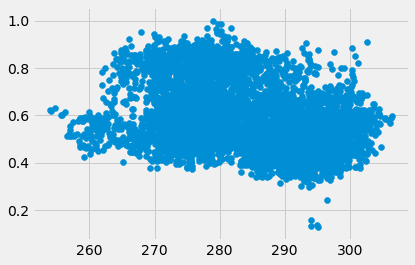

In [6]:
# trash = LinearRegression().fit(combined[[1,2,3,4,5],:],combined['resi'])

x = combined['temp'].values
y = combined['resi'].values

x.reshape(4990,1)
y.reshape(4990,1)

x.shape

plots.scatter(combined['temp'], combined['resi'])

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(combined['temp'])
y = pd.DataFrame(combined['resi'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').